In [1]:
# Importing all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics as mt


In [2]:
#importing Dataset

train_data= pd.read_csv('training_set.csv')
test_data= pd.read_csv('test_set.csv')

In [3]:
train_data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,...,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,...,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1


### Checking for missing values in the data

In [4]:
train_data.isnull().sum()

test_data.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
X24           0
X25           0
X26           0
X27           0
X28           0
X29           0
X30           0
X31           0
X32           0
X33           0
X34           0
X35           0
X36           0
X37           0
X38           0
X39           0
X40           0
X41           0
X42           0
X43           0
X44           0
X45           0
X46           0
X47           0
X48           0
X49           0
X50           0
X51           0
X52           0
X53           0
X54           0
X55           0
X56           0
X57           0
dtype: int64

### Checking the distribution of the target variable Y

In [5]:
train_data['Y'].value_counts(normalize=True)

0    0.607673
1    0.392327
Name: Y, dtype: float64

We have 60% 0s and only 40%  1s in our dataset.

In [6]:
train_data.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,1954.500000,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,1128.864105,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,977.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,1954.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,2931.750000,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,3909.000000,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


In [7]:
train_data.dtypes

Unnamed: 0      int64
X1            float64
X2            float64
X3            float64
X4            float64
X5            float64
X6            float64
X7            float64
X8            float64
X9            float64
X10           float64
X11           float64
X12           float64
X13           float64
X14           float64
X15           float64
X16           float64
X17           float64
X18           float64
X19           float64
X20           float64
X21           float64
X22           float64
X23           float64
X24           float64
X25           float64
X26           float64
X27           float64
X28           float64
X29           float64
X30           float64
X31           float64
X32           float64
X33           float64
X34           float64
X35           float64
X36           float64
X37           float64
X38           float64
X39           float64
X40           float64
X41           float64
X42           float64
X43           float64
X44           float64
X45       

### Checking co-relation of the variables

In [8]:
train_data.corr().style.background_gradient(cmap='summer_r')

In [9]:
train_data= train_data.drop('Unnamed: 0', axis=1)

### Splitting the data into train and test

In [10]:
X = train_data.drop(['Y'],axis=1)
y = train_data['Y']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

### Checking for Constant features

In [12]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

sum(var_thres.get_support())

len(X_train.columns[var_thres.get_support()])

constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


### Removing Corelated Features if any

In [13]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [14]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

2

In [15]:
corr_features

{'X34', 'X40'}

In [16]:
corr_features_test = correlation(X_test, 0.8)
len(set(corr_features_test))

4

In [17]:
corr_features_test

{'X32', 'X34', 'X36', 'X40'}

In [18]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features_test,axis=1)

In [19]:
X_train=X_train.drop('X32',axis=1)

### Important features

In [20]:
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.05403986, 0.09422222, 0.07674393, 0.00230469, 0.09763218,
       0.06754011, 0.14919443, 0.07288087, 0.0586756 , 0.07552355,
       0.08757452, 0.05856424, 0.04233934, 0.0243987 , 0.036775  ,
       0.13338911, 0.079964  , 0.05126671, 0.1337579 , 0.05391486,
       0.16222345, 0.0036035 , 0.1106385 , 0.1237548 , 0.10355487,
       0.08084786, 0.09938484, 0.02548326, 0.01633578, 0.03866626,
       0.02047917, 0.01632226, 0.04437592, 0.01736016, 0.04270213,
       0.00341504, 0.00541181, 0.02276584, 0.01599099, 0.03440899,
       0.01167718, 0.04257529, 0.02708868, 0.01009108, 0.0095    ,
       0.02620122, 0.0500616 , 0.02243687, 0.21340074, 0.19529031,
       0.06227363, 0.17195116, 0.18913399, 0.1273232 ])

In [21]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

X52    0.213401
X53    0.195290
X56    0.189134
X55    0.171951
X21    0.162223
X7     0.149194
X19    0.133758
X16    0.133389
X57    0.127323
X24    0.123755
X23    0.110639
X25    0.103555
X27    0.099385
X5     0.097632
X2     0.094222
X11    0.087575
X26    0.080848
X17    0.079964
X3     0.076744
X10    0.075524
X8     0.072881
X6     0.067540
X54    0.062274
X9     0.058676
X12    0.058564
X1     0.054040
X20    0.053915
X18    0.051267
X50    0.050062
X35    0.044376
X37    0.042702
X45    0.042575
X13    0.042339
X30    0.038666
X15    0.036775
X43    0.034409
X46    0.027089
X49    0.026201
X28    0.025483
X14    0.024399
X41    0.022766
X51    0.022437
X31    0.020479
X36    0.017360
X29    0.016336
X33    0.016322
X42    0.015991
X44    0.011677
X47    0.010091
X48    0.009500
X39    0.005412
X22    0.003603
X38    0.003415
X4     0.002305
dtype: float64

<AxesSubplot:>

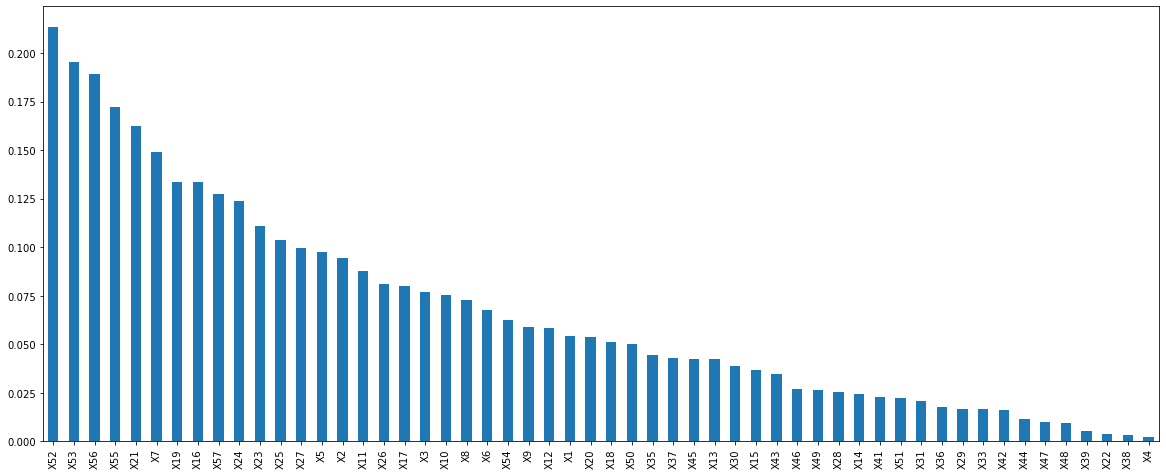

In [22]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [23]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3128, 54) (782, 53) (3128,) (782,)


In [24]:
#No we Will select the  top 15 important features
sel_15_cols = SelectKBest(mutual_info_classif, k=15)
sel_15_cols.fit(X_train, y_train)
cols=X_train.columns[sel_15_cols.get_support()]

In [25]:
cols

Index(['X5', 'X7', 'X16', 'X17', 'X19', 'X21', 'X23', 'X24', 'X25', 'X27',
       'X52', 'X53', 'X55', 'X56', 'X57'],
      dtype='object')

In [26]:
X_train=X_train[['X3', 'X5', 'X7', 'X16', 'X19', 'X21', 'X23', 'X24', 'X25', 'X27',
       'X52', 'X53', 'X55', 'X56', 'X57']]

In [27]:
X_test=X_test[['X3', 'X5', 'X7', 'X16', 'X19', 'X21', 'X23', 'X24', 'X25', 'X27',
       'X52', 'X53', 'X55', 'X56', 'X57']]

### Scaling the data

In [28]:
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

### Logistic Regression

In [29]:
lm=LogisticRegression()

lm.fit(X_train,y_train)

x_pred = lm.predict(X_train)

x_pred_prob=lm.predict_proba(X_train)
y_pred=lm.predict(X_test)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       475
           1       0.90      0.85      0.88       307

    accuracy                           0.91       782
   macro avg       0.90      0.90      0.90       782
weighted avg       0.91      0.91      0.90       782



In [31]:
y_pred     = lm.predict(X_test)
y_pred_prob= lm.predict_proba(X_test)
print('Test Data Score : {0:.3f}'.format(lm.score(X_test, y_test)))

print('Accuracy : {0:.3f}'.format(mt.accuracy_score(y_test, y_pred)))

print('\nRecall : {0:.3f}'.format(mt.recall_score(y_test, y_pred)))
print('Precission : {0:.3f}'.format(mt.precision_score(y_test, y_pred)))

print('\nAUC : {0:.3f}'.format(mt.roc_auc_score(y_test, y_pred_prob[:,1]) ))
print('F-Beta Score : {0:.3f}'.format(mt.fbeta_score(y_test, y_pred, beta=2)))

Test Data Score : 0.905
Accuracy : 0.905

Recall : 0.850
Precission : 0.903

AUC : 0.957
F-Beta Score : 0.860


### Random Forest Classifier

In [32]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

x_pred = model.predict(X_train)

x_pred_prob=model.predict_proba(X_train)

y_pred=model.predict(X_test)

In [33]:
y_pred     = model.predict(X_test)
y_pred_prob= model.predict_proba(X_test)
print('Test Data Score : {0:.3f}'.format(model.score(X_test, y_test)))

print('Accuracy : {0:.3f}'.format(mt.accuracy_score(y_test, y_pred)))

print('\nRecall : {0:.3f}'.format(mt.recall_score(y_test, y_pred)))
print('Precission : {0:.3f}'.format(mt.precision_score(y_test, y_pred)))

print('\nAUC : {0:.3f}'.format(mt.roc_auc_score(y_test, y_pred_prob[:,1]) ))
print('F-Beta Score : {0:.3f}'.format(mt.fbeta_score(y_test, y_pred, beta=1)))

Test Data Score : 0.949
Accuracy : 0.949

Recall : 0.935
Precission : 0.935

AUC : 0.983
F-Beta Score : 0.935


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       475
           1       0.93      0.93      0.93       307

    accuracy                           0.95       782
   macro avg       0.95      0.95      0.95       782
weighted avg       0.95      0.95      0.95       782



In [35]:
cross_val_score(model, X_train,y_train,cv=10)

array([0.92971246, 0.94249201, 0.97124601, 0.92651757, 0.94888179,
       0.91693291, 0.9456869 , 0.95527157, 0.92948718, 0.94230769])

In [36]:
cross_val_score(model, X_test,y_test,cv=10)

array([0.94936709, 0.93670886, 0.91025641, 0.96153846, 0.94871795,
       0.88461538, 0.93589744, 0.94871795, 0.93589744, 0.91025641])

### XGB Classifier

In [37]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

x_pred3 = xgb.predict(X_train)
x_pred_prob3= xgb.predict_proba(X_train)
y_pred3 = xgb.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:53:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [38]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       475
           1       0.93      0.93      0.93       307

    accuracy                           0.95       782
   macro avg       0.94      0.94      0.94       782
weighted avg       0.95      0.95      0.95       782



In [39]:
y_pred3     = xgb.predict(X_test)
y_pred_prob3= xgb.predict_proba(X_test)
print('Test Data Score : {0:.3f}'.format(model.score(X_test, y_test)))

print('Accuracy : {0:.3f}'.format(mt.accuracy_score(y_test, y_pred3)))

print('\nRecall : {0:.3f}'.format(mt.recall_score(y_test, y_pred3)))
print('Precission : {0:.3f}'.format(mt.precision_score(y_test, y_pred3)))

print('\nAUC : {0:.3f}'.format(mt.roc_auc_score(y_test, y_pred_prob3[:,1]) ))
print('F-Beta Score : {0:.3f}'.format(mt.fbeta_score(y_test, y_pred3, beta=2)))

Test Data Score : 0.949
Accuracy : 0.945

Recall : 0.932
Precission : 0.929

AUC : 0.981
F-Beta Score : 0.931


### Test set

In [40]:
test_data.head(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [41]:
test_data= test_data.drop('Unnamed: 0', axis=1)

In [42]:
test_data=test_data[['X3', 'X5', 'X7', 'X16', 'X19', 'X21', 'X23', 'X24', 'X25', 'X27',
       'X52', 'X53', 'X55', 'X56', 'X57']]

In [43]:
test_data= scaler.fit_transform(test_data)

### Final predictions on test set

In [45]:
test_data_pred = pd.DataFrame(model.predict(test_data), columns=['pred'])

In [46]:
test_data_pred.to_csv('test_data_pred.csv',index=False)

In [47]:
test_data_pred.value_counts()

pred
0       435
1       256
dtype: int64

###  Model predictions for the test dataset

In [48]:
test_data_pred

,pred
0,0
1,1
2,1
3,1
4,1
...,...
686,0
687,0
688,0
689,0
